In [1]:
import math
import numpy as np
from decimal import *
getcontext().prec = 50

def Findladder(n):
    
# This function determines 
# all the possible configurations 
# in the correct order for any number of
# states.
    
    if n == 1:
        return([[0], [1]])
    elif n == 2:
        return([[0,0], [0,1], [1,1], [1,0]])
    elif n > 2:
        reverse = Findladder(n-1)[::-1]
        first = []
        for i in Findladder(n-1):
            A = [0]+i
            first.append(A)
        second = []
        for i in reverse:
            B = [1]+i
            second.append(B)
        return(first + second)

In [527]:
def states(n):
    
# This function determines all the 
# values of p in the set of detailed
# balanced equations for any number
# of states.

    config = Findladder(n)
    r = []
    for i in range(1, len(config)):
        x= 0
        for j in range(len(config[i])):
            if config[i][j] != config[i-1][j]:
                x += (j) 
                r.append(x)
    return(r)    

In [528]:
def occupation(n):
    
# This function determines all the 
# values of N^{~} in the set of detailed
# balanced equations for any number of
# states.
    
    config = Findladder(n)
    d = []
    for i in range(1, len(config)):
        y = 0
        for j in range(len(config[i])):
            if config[i][j] == config[i-1][j]:
                y += config[i][j]
        d.append(y)
    return(d)



In [5]:
# The following function
# gives us U(N).

def U(C, ne, qext):
    
    
    return(
        
        ((((ne) - qext)**2)/(2*C)) - (((qext)**2)/(2*C))
    
    )

In [6]:
U(1,-1,0)

0.5

In [7]:
# The following are the conditions
# for energy conservation upon 
# tunneling. 

def efl(C, ne, qext, eta, eV, ep):
    
    output = ep + U(C, ne, qext) - U(C, (ne - 1), qext) + (eta)*(eV)
    
    return(output)

def eil(C, ne, qext, eta, eV, ep): 
    
    return(ep + U(C, (ne + 1), qext) - U(C, ne, qext) + (eta)*(eV))

def efr(C, ne, qext, eta, eV, ep):
    
    return(ep + U(C, ne, qext) - U(C, (ne-1), qext) - (1 - eta)*(eV))

def eir(C, ne, qext, eta, eV, ep):
    
    return(ep + U(C, (ne + 1), qext) - U(C, ne, qext) - (1 - eta)*(eV))

In [11]:
eir(1,2,5,0.5,5,-2)

-7.0

In [12]:
# The function below is the Fermi-Dirac distribution 

def F(kt, E): 
    
    return(
        
        ((1 + Decimal(math.exp((E)/(kt))))**(-1))
    
    )

In [14]:
F(0.1, 0.1)

Decimal('0.2689414213699951312051307275')

In [15]:
1+ Decimal(math.exp((-5)/(0.1)))

Decimal('1.000000000000000000000192875')

In [13]:
# The following function returns the coefficient 
# on the right hand side of the set of detailed
# balanced equations for any capacitance, occupation number,
# "externally induced charge", eta, source/ drain voltage, 
# any energy level and any set of tunnel rates.  

def numerator(gammapl, gammapr, C, ne, qext, eta, eV , kt, ep, ef): 
    
    return(
        
    gammapl*( F(kt, eil(C, ne, qext, eta, eV, ep) - ef)) + 
        
    gammapr*(F(kt, eir(C, ne, qext, eta, eV, ep) - ef))
        
    )

In [17]:
numerator(1, 1, 1, 2, -10, 0.5, 0, 0.1, -2, 0)

Decimal('5.013134951799906289301425894E-46')

In [14]:
# The following function returns the coefficient 
# on the left hand side of the set of detailed
# balanced equations for any capacitance, occupation number,
# "externally induced charge", eta, source/ drain voltage, 
# any energy level and any set of tunnel rates. 

def denominator(gammapl, gammapr, C, ne, qext, eta, eV, kt, ep, ef):
    
    return(
        
    #gammapl* (1 - F(kt, efl(C, (ne + 1), qext, eta, eV, ep) - ef)) + 
        
    gammapl*(Decimal(math.exp((efl(C, (ne + 1), qext, eta, eV, ep) - ef)/kt)))/(1 +
                                                                                
    Decimal(math.exp((efl(C, (ne + 1), qext, eta, eV, ep) - ef)/kt))) +   
    
    gammapr*( Decimal(math.exp((efr(C, (ne + 1), qext, eta, eV, ep) - ef)/kt)))/(1 +
                                                                                 
    Decimal(math.exp((efr(C, (ne + 1), qext, eta, eV, ep) - ef)/kt))) 
        
    #gammapr*(1 - F(kt, efr(C, (ne + 1), qext, eta, eV, ep) - ef))
        
    )


In [19]:
F(0.1,efl(1, 3, 5, 0.5, 1,0))

Decimal('0.9999999979388463818097963765')

In [20]:
#I(1, 1, 1, 2, i, 0.5, 1, 0.1, [0,0], 0)

v = denominator(1,1,1,0,5,0.5,5., 0.1,0,0)
t = numerator(1,1,1,0,5,0.5,5., 0.1,0,0)

v/t
#efl(1, 3, 5, 0.5, 1, 0)

Decimal('1.030576810157190372242623895E-9')

In [15]:
# The following function simply calculates
# the ratio between the numerator function
# and the denominator function for any capacitance, occupation number,
# "externally induced charge", eta, source/ drain voltage, 
# any energy level and any set of tunnel rates.  

def ratio(gammapl, gammapr, C, ne, qext, eta, eV, kt, ep, ef):
    
    return(
    numerator(gammapl, gammapr, C, ne, qext, eta, eV , kt, ep, ef)/ 
    denominator(gammapl, gammapr, C, ne, qext, eta, eV , kt, ep, ef)
        
    )

In [22]:
1/ratio(1,1,1,0,5,0.5,5., 0.1,0,0)

Decimal('1.030576810157190372242623895E-9')

In [530]:
def power(n):  

# This function determines whether the following configuration 
# is more filled or less filled and then acts accordingly.


    config = Findladder(n)

    powers = []
    for i in range(1,len(config)):
        x = 0
        for j in range(n):
            x += config[i][j]-config[i-1][j]
        powers.append(x)
    return(powers)

In [17]:
# Using the ratio function, the following is an automated function that returns 
# the list of ratios that is required to determine the probabilities of all
# the configurations for any capacitance, occupation number,
# "externally induced charge", eta, source/ drain voltage, 
# any energy level and any set of tunnel rates.  

def AutoRatio(gammapl, gammapr, C, n, qext, eta, eV, kt, ep, ef):
    ratios = []
    stateslist = states(n)
    occupations = occupation(n)
    powers = power(n)
    for i in range((2**n)-1):
        
        element = (1/ratio(gammapl[stateslist[i]],
                  gammapr[stateslist[i]], C, occupations[i], 
                  qext, eta, eV, kt, ep[stateslist[i]], ef))**(powers[i])
        ratios.append(element)
    return(ratios)

In [23]:
enlist = [0,0]

In [254]:
AutoRatio(1, 1, 1, 2, 5, 0.5, 5.0, 0.1, [0, 0], 0)

[Decimal('1.030576810157190372242623895E-9'),
 Decimal('0.00002269944960453358064199677105'),
 Decimal('44053.93158961343047460844651')]

In [18]:
# The following function gives us the probability of obtaining 
# the final configuration for any capacitance, number of states,
# "externally induced charge", eta, source/ drain voltage, 
# any set of energy levels and any set of tunnel rates. 

def probn(gammapl, gammapr, C, n, qext, eta, eV, kt, ep, ef):

    parts = [1]
    ratios = AutoRatio(gammapl, gammapr, C, n, qext, eta, eV, kt, ep, ef)
    for i in range(len(ratios)-1): 
        m = np.prod(ratios[i:len(ratios)])
        parts.append(m)
    parts.append(ratios[-1])
    return(1/(sum(parts)))

In [137]:
probn(1, 1, 1, 2, 5, 0.5, 5, 0.1, [-2, -2], 0)

Decimal('0.02278733333675412486070949841')

In [19]:
# The following function gives us the probabilities of all the
# configurations for any capacitance, number of states,
# "externally induced charge", eta, source/ drain voltage, 
# any set of energy levels and any set of tunnel rates. 

def ALLPROBABILITIES(gammapl, gammapr, C, n, qext, eta, eV, kt, ep, ef):    
    
    probabilities = [probn(gammapl, gammapr, C, n, qext, eta, eV, kt, ep, ef)]
    z= probn(gammapl, gammapr, C, n, qext, eta, eV, kt, ep, ef)
    ratios = AutoRatio(gammapl, gammapr, C, n, qext, eta, eV, kt, ep, ef)
    length = len(ratios)
    for i in range(length):
        z=z*ratios[-1-i]
        probabilities.append(z)
    probabilities.reverse()
    return(probabilities)

In [581]:
ALLPROBABILITIES([1, 1], [1, 1], 1, 2, 5, 0.5, 1, 0.1, [0, 0], 0)

[Decimal('9.939526785949176065747329783E-32'),
 Decimal('4.679023902132195229566390735E-14'),
 Decimal('0.9999999999999064195219573561'),
 Decimal('4.679023902132195229566390735E-14')]

In [30]:
ALLPROBABILITIES([1,1], [1,1], 1, 2, 5, 0.5, 1, 0.1, [0, 0], 0)



[Decimal('9.939526785949176065747329783E-32'),
 Decimal('4.679023902132195229566390735E-14'),
 Decimal('0.9999999999999064195219573561'),
 Decimal('4.679023902132195229566390735E-14')]

In [20]:
# The following function gives us the stationary 
# current through the left barrier for any 
# capacitance, number of states,
# "externally induced charge", eta, source/ drain voltage, 
# any set of energy levels and any set of tunnel rates. 

def I(gammapl, gammapr, C, n, qext, eta, eV, kt, ep, ef):
    
    I = 0
    pr = ALLPROBABILITIES(gammapl, gammapr, C, n, qext, eta, eV, kt, ep, ef)
    config = Findladder(n)  
    stateslist = states(n)
    for i in range(n):
        GL = gammapl[stateslist[i]]
        for j in range(len(config)):
            ne = sum(config[j])
            pni = pr[j]
            if config[j][i] == 0:
                I += GL*pni*(-1)*(F(kt, eil(C, ne, qext, eta, eV, ep[i])-ef))
            elif config[j][i] == 1:
                I += GL*pni*(1- F(kt, efl(C, ne, qext, eta, eV, ep[i])-ef))
                
    
    return(I)

In [32]:
I([1, 1], [2, 2], 1, 2, 5, 0.5, 1, 0.1, [0,0], 0)

Decimal('1.247626417788467916620521558E-13')

In [308]:
(1-F(0.1, efl(1,1,5,0.5,3,-2.82843))) - (1-F(0.1, eil(1,1,5,0.5,3,-2.82843)))

Decimal('-1.0724450E-21')

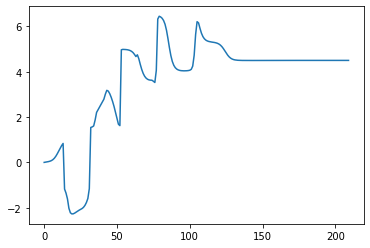

In [326]:
practice = []
for i in np.arange(0, 21, 0.1):
    practice.append(I(1, 1, 1, 9, 5, 0.5, i, 0.1, [-2.82843, -1.41421, -1.41421, 0, 0, 0, 1.41421, 1.41421, 2.82843], 0))
plt.plot(practice)

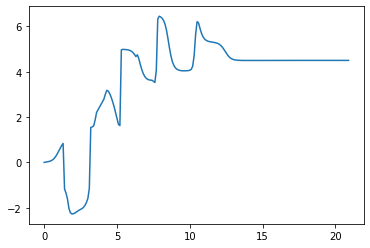

In [328]:
plt.plot([i for i in np.arange(0,21,0.1)],practice)

In [296]:
I(1,1,1,2,5,0.5,4,0.1,[-10,-20],0)

Decimal('-5.689899367539340814352984799E-51')

In [36]:
ALLPROBABILITIES([1,1], [1,1], 1, 3, 5, 0.5, 0, 0.1, [0,0,0], 0)[0]

IndexError: list index out of range

In [250]:
#import timeit
#start = timeit.timeit()
#print(I(1, 1, 1, 7, 5, 0.5, 1, 1, [0,0,0,0,0,0,0], 0))
#end = timeit.timeit()
#print(end - start)


  
I(1, 1, 1, 9, 5, 0.5, 1, 1, [0,0,0,0,0,0,0,0,0], 0)


Decimal('0.9376264616354851735922740493')

In [40]:
probs1 = []
probs2 = []
probs3 = []
probs4 = []
probs5 = []
probs6 = []
probs7 = []
probs8 = []
for i in range(51):
    probs1.append(ALLPROBABILITIES([1,1,1], [1,1,1], 1, 3, 5, 0.5, i, 0.1, [0,0,0], 0)[0])
    probs2.append(ALLPROBABILITIES([1,1,1], [1,1,1], 1, 3, 5, 0.5, i, 0.1, [0,0,0], 0)[1])
    probs3.append(ALLPROBABILITIES([1,1,1], [1,1,1], 1, 3, 5, 0.5, i, 0.1, [0,0,0], 0)[2])
    probs4.append(ALLPROBABILITIES([1,1,1], [1,1,1], 1, 3, 5, 0.5, i, 0.1, [0,0,0], 0)[3])
    probs5.append(ALLPROBABILITIES([1,1,1], [1,1,1], 1, 3, 5, 0.5, i, 0.1, [0,0,0], 0)[4])
    probs6.append(ALLPROBABILITIES([1,1,1], [1,1,1], 1, 3, 5, 0.5, i, 0.1, [0,0,0], 0)[5])
    probs7.append(ALLPROBABILITIES([1,1,1], [1,1,1], 1, 3, 5, 0.5, i, 0.1, [0,0,0], 0)[6])
    probs8.append(ALLPROBABILITIES([1,1,1], [1,1,1], 1, 3, 5, 0.5, i, 0.1, [0,0,0], 0)[7])


[[0, 0, 0],
 [0, 0, 1],
 [0, 1, 1],
 [0, 1, 0],
 [1, 1, 0],
 [1, 1, 1],
 [1, 0, 1],
 [1, 0, 0]]

In [546]:
Findladder(3)[5]

[1, 1, 1]

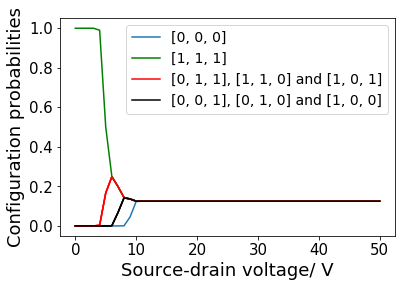

In [549]:
#plt.title("Three-state configuration probabilities against voltage.")
plt.xlabel("Source-drain voltage/ V", fontsize=18)
plt.ylabel("Configuration probabilities", fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.plot(horizontal, probs1, label = "[0, 0, 0]")
plt.plot(horizontal, probs2, color = 'k')
plt.plot(horizontal, probs3, color = 'r')
plt.plot(horizontal, probs4, color = 'k')
plt.plot(horizontal, probs5, color = 'r')
plt.plot(horizontal, probs6, label = "[1, 1, 1]", color = 'g')
plt.plot(horizontal, probs7, label = "[0, 1, 1], [1, 1, 0] and [1, 0, 1]", color = 'r')  
plt.plot(horizontal, probs8, label = "[0, 0, 1], [0, 1, 0] and [1, 0, 0]", color = 'k')
plt.legend(prop={'size': 14})

In [31]:
p1 = []
p2 = []
p3 = []
p4 = []
for i in range(51):
    p1.append(ALLPROBABILITIES([1, 1], [1, 1], 1, 2, -5, 0.5, i, 0.1, [0, 0], 1)[0])
    p2.append(ALLPROBABILITIES([1, 1], [1, 1], 1, 2, -5, 0.5, i, 0.1, [0, 0], 1)[1])
    p3.append(ALLPROBABILITIES([1, 1], [1, 1], 1, 2, -5, 0.5, i, 0.1, [0, 0], 1)[2])
    p4.append(ALLPROBABILITIES([1, 1], [1, 1], 1, 2, -5, 0.5, i, 0.1, [0, 0], 1)[3])

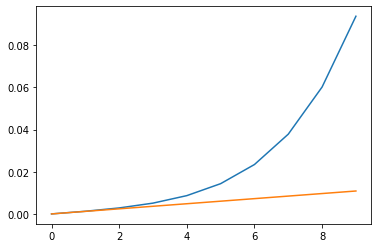

In [562]:
I1 = []
I2 = []
for i in np.arange(0, 1, 0.1):
    I1.append(I(1, 1, 1, 2, 5, 0.5, i, 0.1, [2.82843, 2.82843], 0))
    I2.append(0.0120735*i)
plt.plot(I1)
plt.plot(I2)

[[0, 0], [0, 1], [1, 1], [1, 0]]

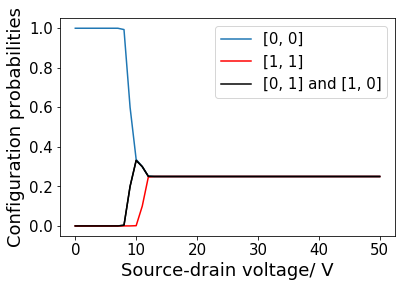

In [550]:
#plt.title("Two-state configuration probabilities against voltage.")
plt.xlabel("Source-drain voltage/ V", fontsize=18)
plt.ylabel("Configuration probabilities", fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.plot(horizontal, p1, label = "[0, 0]")
plt.plot(horizontal, p2, color = 'k')
plt.plot(horizontal, p3, label = "[1, 1]", color = 'r')
plt.plot(horizontal, p4, label = "[0, 1] and [1, 0]", color = 'k')

plt.legend(prop={'size': 15})

Findladder(2)

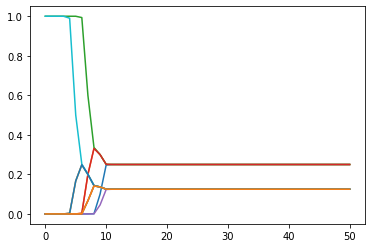

In [45]:
plt.plot(horizontal, p1)
plt.plot(horizontal, p2)
plt.plot(horizontal, p3)
plt.plot(horizontal, p4)
plt.plot(horizontal, probs1)
plt.plot(horizontal, probs2)
plt.plot(horizontal, probs3)
plt.plot(horizontal, probs4)
plt.plot(horizontal, probs5)
plt.plot(horizontal, probs6)
plt.plot(horizontal, probs7)  
plt.plot(horizontal, probs8)

In [24]:
import matplotlib.pyplot as plt


In [50]:
results = []
results1 = []
results2 = []
results5 = []
results10 = []
for i in range(51):
    results.append(I([1, 1], [1, 1], 1, 2, 5, 0.5, i, 1, [0,0], 0))
    
    results1.append(I([1, 1], [1, 1], 1, 2, 5, 0.5, i, 1, [0,0], 1))
    
    results2.append(I([1, 1], [1, 1], 1, 2, 5, 0.5, i, 1, [0,0], 2))
    
    results5.append(I([1, 1], [1, 1], 1, 2, 5, 0.5, i, 1, [0,0], 5))
    
    results10.append(I([1, 1], [1, 1], 1, 2, 5, 0.5, i, 1, [0,0], 10))
    
    #fermi energy (ef) data
    


In [51]:
horizontal = [i for i in range(51)]
vertical = results
vertical1 = results1
vertical2 = results2
vertical5 = results5
vertical10 = results10

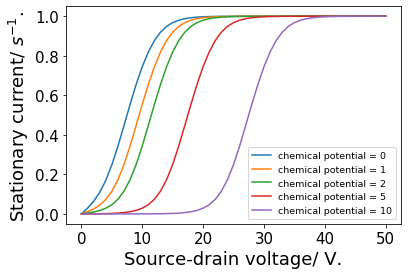

In [246]:
plt.xlabel("Source-drain voltage/ V.", fontsize=18)
plt.ylabel("Stationary current/ $s^{-1}$.", fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.title(" Two state system currents at different fermi energies.")
plt.plot(horizontal, vertical, label = "chemical potential = 0")
plt.plot(horizontal, vertical1, label = "chemical potential = 1")
plt.plot(horizontal, vertical2, label = "chemical potential = 2")
plt.plot(horizontal, vertical5, label = "chemical potential = 5")
plt.plot(horizontal, vertical10, label = "chemical potential = 10")
plt.legend(loc = "lower right", prop={'size': 9.5})

In [256]:
Tresults1 = []
Tresults2 = []
Tresults5 = []
Tresults10 = []
Tresults20 = []
for i in range(51):
    Tresults1.append(I([1, 1], [1, 1], 1, 2, 5, 0.5, i, 1, [0,0], 0))
    
    Tresults2.append(I([1, 1], [1, 1], 1, 2, 5, 0.5, i, 2, [0,0], 0))
    
    Tresults5.append(I([1, 1], [1, 1], 1, 2, 5, 0.5, i, 5, [0,0], 0))
    
    Tresults10.append(I([1, 1], [1, 1], 1, 2, 5, 0.5, i, 10, [0,0], 0))
    
    Tresults20.append(I([1, 1], [1, 1], 1, 2, 5, 0.5, i, 20, [0,0], 0))
    
    
    # internal energy (kt) data
    
    
    

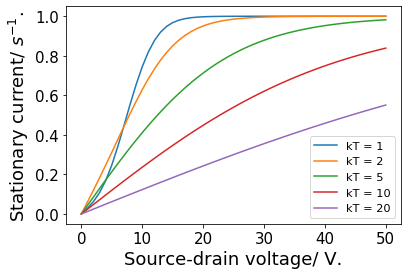

In [280]:
plt.xlabel("Source-drain voltage/ V.", fontsize=18)
plt.ylabel("Stationary current/ $s^{-1}$.", fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.title("Two State System Currents at Different Temperatures.")
plt.plot(horizontal, Tresults1, label = "kT = 1")
plt.plot(horizontal, Tresults2, label = "kT = 2")
plt.plot(horizontal, Tresults5, label = "kT = 5")
plt.plot(horizontal, Tresults10, label = "kT = 10")
plt.plot(horizontal, Tresults20, label = "kT = 20")
plt.legend(loc = "lower right", prop={'size': 11.3745})

In [231]:
Cresults05 = []
Cresults1 = []
Cresults2 = []
Cresults3 = []
Cresults10 = []
for i in range(51):
    Cresults05.append(I([1, 1], [1, 1], 0.5, 2, 5, 0.5, i, 1, [0,0], 0))
    
    Cresults1.append(I([1, 1], [1, 1], 1, 2, 5, 0.5, i, 1, [0,0], 0))
    
    Cresults2.append(I([1, 1], [1, 1], 2, 2, 5, 0.5, i, 1, [0,0], 0))
    
    Cresults3.append(I([1, 1], [1, 1], 3, 2, 5, 0.5, i, 1, [0,0], 0))
    
    Cresults10.append(I([1, 1], [1, 1], 10, 2, 5, 0.5, i, 1, [0,0], 0))
    


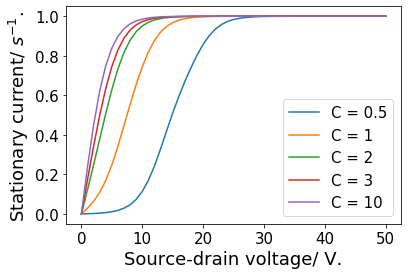

In [239]:
plt.xlabel("Source-drain voltage/ V.", fontsize=18)
plt.ylabel("Stationary current/ $s^{-1}$.", fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.title("Two State System Currents at Different Values of C.")
plt.plot(horizontal, Cresults05, label = "C = 0.5")
plt.plot(horizontal, Cresults1, label = "C = 1")
plt.plot(horizontal, Cresults2, label = "C = 2")
plt.plot(horizontal, Cresults3, label = "C = 3")
plt.plot(horizontal, Cresults10, label = "C = 10")
plt.legend(loc = "lower right", prop={'size': 15})

In [52]:
def fermi(E, ef, kt):
    
    return(
    
    (1+ math.exp((E-ef)/kt))**(-1)
        
    )

In [53]:
fd = []
for i in range(10):
    fd.append(fermi(i,5,1.5))
fd    

[0.9655548043337889,
 0.935030830871336,
 0.8807970779778823,
 0.791391472673955,
 0.6607563687658172,
 0.5,
 0.33924363123418283,
 0.20860852732604496,
 0.11920292202211755,
 0.06496916912866407]

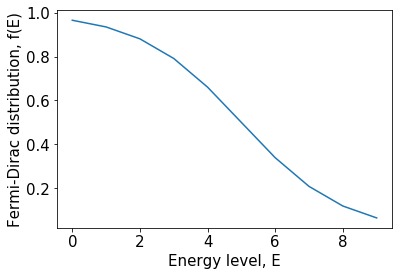

In [298]:
xdata = [i for i in range(10)]
plt.xlabel("Energy level, E", fontsize=15)
plt.ylabel("Fermi-Dirac distribution, f(E)", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.title("Fermi-Dirac distribution against the energy level")
plt.plot(xdata, fd)

In [248]:
two = []
three = []
four = []
five = []
for i in range(51):
    two.append(I([1, 1], [1, 1], 1, 2, 5, 0.5, i, 1, [0,0], 0))
    three.append(I([1, 1, 1], [1, 1, 1], 1, 3, 5, 0.5, i, 1, [0,0,0], 0))
    four.append(I([1, 1, 1, 1], [1, 1, 1, 1], 1, 4, 5, 0.5, i, 1, [0,0,0,0], 0))
    five.append(I([1, 1, 1, 1, 1], [1, 1, 1, 1, 1], 1, 5, 5, 0.5, i, 1, [0,0,0,0,0], 0))

In [249]:
six = []
for i in range(51):
    six.append(I([1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1], 1, 6, 5, 0.5, i, 1, [0,0,0,0,0,0], 0))

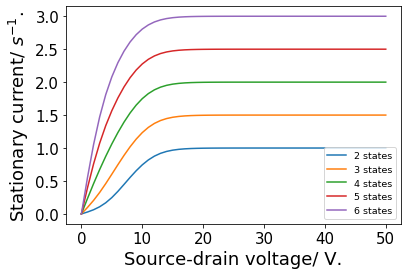

In [254]:
plt.xlabel("Source-drain voltage/ V.", fontsize=18)
plt.ylabel("Stationary current/ $s^{-1}$.", fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.title("Stationary Currents Against Voltage for Different Numbers of States.")
plt.plot(horizontal, two, label = "2 states")
plt.plot(horizontal, three, label =  "3 states")
plt.plot(horizontal, four, label =  "4 states")
plt.plot(horizontal, five, label = "5 states")
plt.plot(horizontal, six, label = "6 states")
plt.legend(loc='lower right', prop={'size': 9.5})

In [174]:
two

[-6.938893903907228e-18,
 0.028858015569945963,
 0.0631952401537389,
 0.10841318797419144,
 0.1691595611288178,
 0.24777438189105983,
 0.34252619358162223,
 0.44735492520932957,
 0.5540439894612674,
 0.6550534179563692,
 0.7447341470884966,
 0.819347983766266,
 0.8773343689953857,
 0.9195387242132756,
 0.9485910563439178,
 0.9677566410772134,
 0.9800263048144845,
 0.9877255058955742,
 0.9924948403665268,
 0.9954253602404036,
 0.9972169734799934,
 0.9983089131533343,
 0.9989731610479312,
 0.9993767693354525,
 0.9996218362845048,
 0.9997705749689896,
 0.9998608256527747,
 0.9999155787519554,
 0.999948793077062,
 0.9999689403835387,
 0.9999811610048815,
 0.9999885734300559,
 0.9999930693828244,
 0.9999957963489998,
 0.9999974503497255,
 0.9999984535563395,
 0.9999990620335509,
 0.9999994310942393,
 0.9999996549410846,
 0.9999997907111408,
 0.9999998730598724,
 0.9999999230069143,
 0.9999999533013308,
 0.9999999716758244,
 0.9999999828205185,
 0.9999999895801179,
 0.9999999936800218,
 0.99

In [72]:
qext = []
for i in np.arange(-5,5,0.1):
    qext.append(I(1, 1, 1, 2, i, 0.5, 1, 0.1, [0,0], -5))

In [73]:
qext

[Decimal('3.719907084832813286890894908E-44'),
 Decimal('1.011175583225724056961975183E-43'),
 Decimal('2.748660213263923505928231924E-43'),
 Decimal('7.471633110323793604526915318E-43'),
 Decimal('2.031000451270552679857925816E-42'),
 Decimal('5.520831620280864709256116094E-42'),
 Decimal('1.500717627139158008730409219E-41'),
 Decimal('4.079373455500550116303774094E-41'),
 Decimal('1.108888673558517264287963899E-40'),
 Decimal('3.014271931118171300950830985E-40'),
 Decimal('8.193640616392680793561564072E-40'),
 Decimal('2.227262439646451057538097082E-39'),
 Decimal('6.054327016900136756815345906E-39'),
 Decimal('1.645736711358853472501191526E-38'),
 Decimal('4.473576196914656485006236542E-38'),
 Decimal('1.216044088429968917689877525E-37'),
 Decimal('3.305550548184275611744547150E-37'),
 Decimal('8.985417988182152711898554864E-37'),
 Decimal('2.442489843838457468346179988E-36'),
 Decimal('6.639375758701850230344525504E-36'),
 Decimal('1.804769447719047051763746567E-35'),
 Decimal('4.9

In [47]:
horizontal1 = [i for i in np.arange(-5,5, 0.1)]

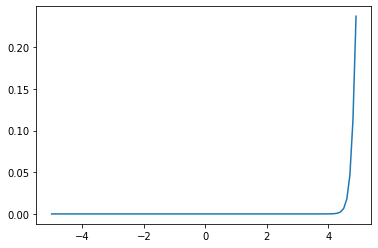

In [75]:
plt.plot(horizontal1, qext)

In [267]:
ALLPROBABILITIES(1, 1, 1, 3, 5, 0.5, 1, 1, [0,0,0], 0)

[2.9950228755470607e-05,
 0.0023972271175271183,
 0.07089892865262055,
 0.0023972271175271183,
 0.07089892865262055,
 0.7800815824608016,
 0.07089892865262055,
 0.0023972271175271183]

In [56]:
def out(x): 
    
    return((0.0279467925)*(x)) 

In [57]:
lineR = []

for i in range(51):
    lineR.append(out(i))

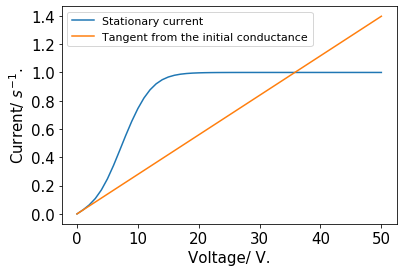

In [63]:
plt.xlabel("Voltage/ V.", fontsize=15)
plt.ylabel("Current/ $s^{-1}$.", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.title("Gradient Test using the Initial Value of the Conductance.")
plt.plot(horizontal, vertical, label = "Stationary current")
plt.plot(horizontal, lineR, label = "Tangent from the initial conductance")
plt.legend(prop={'size': 11})

In [476]:
def Z(QEXT, eV):
    return( I([1, 1, 1, 1], [1, 1, 1, 1], 1, 4, QEXT, 0.5, eV, 0.1, [0, 0, 0, 0], 0))

def charge_density(qext, eV):
        
        return(
        
        (0*ALLPROBABILITIES([1, 1], [1, 1], 1, 2, qext, 0.5, eV, 0.1, [0, 0], 1)[0]) +
        
        (1*ALLPROBABILITIES([1, 1], [1, 1], 1, 2, qext, 0.5, eV, 0.1, [0, 0], 1)[1]) +
        
        (2*ALLPROBABILITIES([1, 1], [1, 1], 1, 2, qext, 0.5, eV, 0.1, [0, 0], 1)[2]) +
        
        (1*ALLPROBABILITIES([1, 1], [1, 1], 1, 2, qext, 0.5, eV, 0.1, [0, 0], 1)[3])
            
                         )
def Z_new(qext, eV):
    return(I_new(1, 1, 1, qext, 0.5, eV, 0.1, [0, 1], 0))

In [459]:
X = np.linspace(-10,10, 200)
Y = np.linspace(0,20,200)

In [141]:
from mpl_toolkits.mplot3d import axes3d, Axes3D
%matplotlib inline


In [477]:
u,v = np.meshgrid(X, Y)
Z2 = np.vectorize(Z_new)
w = Z2(u,v)



In [122]:
len(w[0])

200

In [161]:
floated = []

for i in range(len(w)):
    emf = []
    for j in range(len(w[i])):
        emf.append(float(w[i][j]))
    floated.append(emf)


In [478]:
nlist = np.array([])
for i in range(len(w)):
    nlist2 = np.array([])
    for j in range(len(w[i])):
        nlist2 = np.append(nlist2, float(w[i][j]))
    nlist = np.hstack((nlist, nlist2))

nlist1 = nlist.reshape(200,200)
nlist1

array([[1.13797987e-50, 3.10893361e-50, 8.49353173e-50, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.31345445e-46, 3.58832593e-46, 9.80322002e-46, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.96550562e-46, 8.10168992e-46, 2.21336217e-45, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.23024155e-03, 3.34672983e-03, 9.03841572e-03, ...,
        9.99261855e-01, 9.97991962e-01, 9.94576948e-01],
       [2.03016728e-03, 5.50764059e-03, 1.47650826e-02, ...,
        9.99552982e-01, 9.98781899e-01, 9.96695415e-01],
       [3.34672983e-03, 9.03841572e-03, 2.39431922e-02, ...,
        9.99729391e-01, 9.99261855e-01, 9.97991962e-01]])

In [231]:
w[0][4]

Decimal('0.02885801556994608797701140786')

In [211]:
dem = np.array([1,2,3, 4,5,6])

dem1 = dem.reshape(2,3)


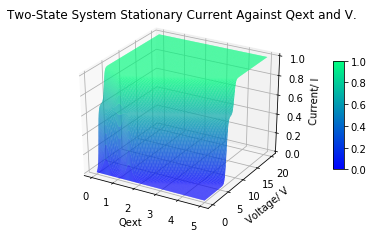

In [125]:
fig = plt.figure()
ax = plt.axes(projection="3d")
ax.plot_wireframe(u, v, nlist1, color='green')



ax = plt.axes(projection='3d')
surf = ax.plot_surface(u, v, nlist1, rstride=1, cstride=1,
                cmap='winter', edgecolor='none')
ax.set_title('Two-State System Stationary Current Against Qext and V.');

ax.set_xlabel('Qext')
ax.set_ylabel('Voltage/ V')
ax.set_zlabel('Current/ I')

ax.set_zlim(0, 1.0)
fig.colorbar(surf, shrink=0.5, aspect=10)

ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([0.95, 0.95, 0.95, 1]))



plt.show()

In [594]:
z_function(1,2)

array(5)

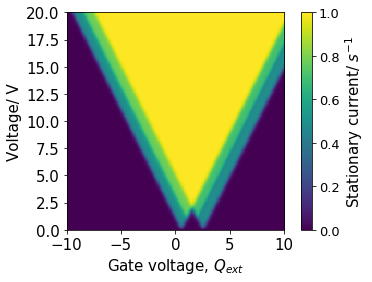

In [479]:
plt.imshow(nlist1, extent=(-10, 10, 0, 20), origin = "lower")

plt.xlabel("Gate voltage, $Q_{ext}$", fontsize=15)
plt.ylabel("Voltage/ V", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

cb = plt.colorbar()
cb.set_label(label="Stationary current/ $s^{-1}$", size=15)
cb.ax.tick_params(labelsize=13)

In [680]:
zero_gate = []
for i in range(51):
    zero_gate.append(I(1, 1, 1, 2, 5, 0.5, i, 1, [0,0], 0))

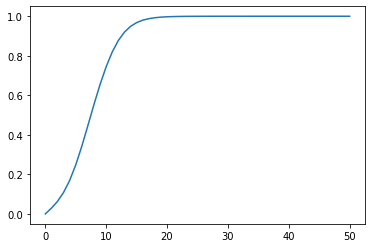

In [681]:
 plt.plot(horizontal, zero_gate)


In [645]:
zero_gate

[-9.020562075079397e-17,
 0.2047941069841352,
 0.3926778457893283,
 0.5530451401620963,
 0.6825028086807743,
 0.7821298044349437,
 0.8552347672798727,
 0.9064068865280633,
 0.9407557891258315,
 0.9630599787538615,
 0.9772001348778492,
 0.9860201120394312,
 0.9914638053373276,
 0.9948012603544535,
 0.9968389052246774,
 0.998079776480159,
 0.9988342466918588,
 0.9992925371540704,
 0.9995707555938191,
 0.9997395961715332,
 0.9998420372430697,
 0.9999041834399656,
 0.9999418816308607,
 0.9999647484383459,
 0.999978618483243,
 0.9999870313206921,
 0.9999921340491443,
 0.9999952290415238,
 0.9999971062607437,
 0.9999982448559683,
 0.9999989354504305,
 0.9999993543177157,
 0.9999996083737759,
 0.9999997624666431,
 0.9999998559287198,
 0.9999999126163451,
 0.9999999469991319,
 0.9999999678533477,
 0.9999999805020694,
 0.9999999881739071,
 0.999999992827112,
 0.9999999956494234,
 0.9999999973612419,
 0.9999999983995123,
 0.9999999990292553,
 0.9999999994112135,
 0.999999999642883,
 0.9999999997

In [79]:
low_temp = []
for i in np.arange(-5, 5,0.1):
    low_temp.append(I(1, 1, 1, 2, i, 0.5, 2, 0.075, [0,0], 0))
low_temp

[Decimal('8.756510762673551566316909324E-27'),
 Decimal('3.321929374980290762104278882E-26'),
 Decimal('1.260229681826735611770933122E-25'),
 Decimal('4.780892883872962212912383408E-25'),
 Decimal('1.813711984146765526276227996E-24'),
 Decimal('6.880620924459675883944098061E-24'),
 Decimal('2.610279069660783449730075266E-23'),
 Decimal('9.902531902735541778543944690E-23'),
 Decimal('3.756691735548356763556812032E-22'),
 Decimal('1.425164082737136130547502538E-21'),
 Decimal('5.406599225335447436953337050E-21'),
 Decimal('2.051084190057407540679224548E-20'),
 Decimal('7.781132241112943194180313895E-20'),
 Decimal('2.951903156739440780874382114E-19'),
 Decimal('1.119854023393620854326289266E-18'),
 Decimal('4.248354255280082747929897916E-18'),
 Decimal('1.611684514349686492238197969E-17'),
 Decimal('6.114195798446425501079441009E-17'),
 Decimal('2.319522830237286386740718614E-16'),
 Decimal('8.799499292055802638755511776E-16'),
 Decimal('3.338237795355916637019975606E-15'),
 Decimal('1.2

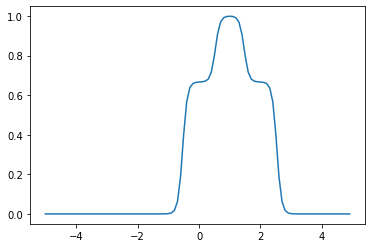

In [82]:
hori = [i for i in np.arange(-5,5,0.1)]
plt.plot(hori, low_temp)

In [255]:
ct = []
for i in np.arange(0, 21, 0.1):
    ct.append(I(1, 1, 1, 2, 5, 0.5, i, 0.075, [0,0], 0))
ct

[Decimal('-4.50699719801725380561E-28'),
 Decimal('7.754776044403286556994360583E-21'),
 Decimal('1.908567801663031482777595328E-20'),
 Decimal('3.921796138194531129764816312E-20'),
 Decimal('7.743565241510619948506561181E-20'),
 Decimal('1.513628855751603978728127408E-19'),
 Decimal('2.950912910062393317399588702E-19'),
 Decimal('5.749013842766375674140099366E-19'),
 Decimal('1.119827919812673382979523700E-18'),
 Decimal('2.181164399998736081111550404E-18'),
 Decimal('4.248347374087486660197923086E-18'),
 Decimal('8.274660667880532073817611736E-18'),
 Decimal('1.611684333074761751589583215E-17'),
 Decimal('3.139132698832892288093081644E-17'),
 Decimal('6.114195750728130236937217212E-17'),
 Decimal('1.190882726571436000461693626E-16'),
 Decimal('2.319522828976217716463129388E-16'),
 Decimal('4.517813574824101591968217354E-16'),
 Decimal('8.799499291748165294252452642E-16'),
 Decimal('1.713908431524933114814772867E-15'),
 Decimal('3.338237795356250625544153740E-15'),
 Decimal('6.5019993

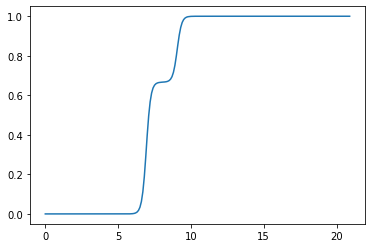

In [109]:
plt.plot([i for i in np.arange(0,21,0.1)], ct)

In [329]:
almost = []
tba = [-2.82843, -1.41421, -1.41421, 0, 0, 0, 1.41421, 1.41421, 2.82843]
for i in range(51):
    almost.append(I(1, 1, 1, 9, 5, 0.5, i, 0.1, tba, -5))
   

In [290]:
almost

[Decimal('-9.337271165953385447748360000E-17'),
 Decimal('0.5031493543375378971320771124'),
 Decimal('-2.267721418984090024685495577'),
 Decimal('-1.592593322818971146397334874'),
 Decimal('2.671450598156376652721477692'),
 Decimal('1.942780527507196364271645432'),
 Decimal('4.900187860510925703132808989'),
 Decimal('3.717431799115020112280189837'),
 Decimal('6.416153659245888079117008134'),
 Decimal('4.181170568408962340171406083'),
 Decimal('4.065878631603433515882680603'),
 Decimal('5.454838761145792260908918557'),
 Decimal('5.221741336152072604669861822'),
 Decimal('4.537782486291473452845590751'),
 Decimal('4.496527300819528532357852558'),
 Decimal('4.499406549137310881919449402'),
 Decimal('4.499995285592527915089368625'),
 Decimal('4.499999968196232893884166702'),
 Decimal('4.499999999785706160151371875'),
 Decimal('4.499999999998556099385749472'),
 Decimal('4.499999999999990271074185601'),
 Decimal('4.499999999999999934447013627'),
 Decimal('4.499999999999999999558307407'),
 De

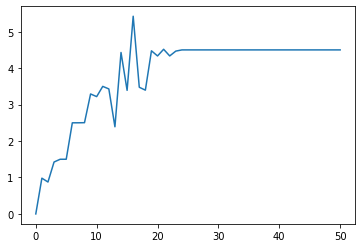

In [330]:
plt.plot([i for i in range(51)], almost)

In [107]:
tba2 = []
for i in range(-10, 10, 1):
    tba2.append(I(1, 1, 1, 2, i, 0.5, 1, 0.01, [0,0], 0))


OverflowError: math range error

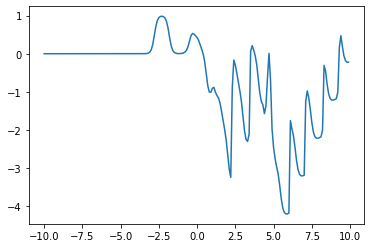

In [105]:
plt.plot([i for i in np.arange(-10,10,0.1)], tba2)

In [288]:
I(1, 1, 1, 9, 5, 0.5, 1, 0.1, tba, 0)

Decimal('0.5031493543357998075904975457')

In [288]:
test = []
TEST1 = []
for i in range(51):
    test.append(I([1, 1], [1, 1], 1, 2, 5, 0.5, i, 0.1, [0, 0], 0))
    TEST1.append(ALLPROBABILITIES([1, 1], [1, 1], 1, 2, 5, 0.5, i, 0.1, [0, 0], 0))

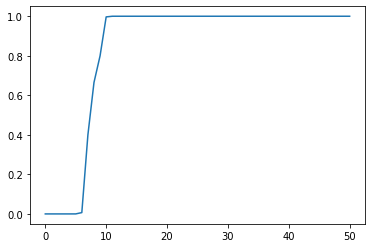

In [289]:
plt.plot(horizontal, test)

In [286]:
test2 = []
for i in range(51):
    test2.append(I(1, 1, 1, 9, 5, 0.5, i, 0.1, [-2.82843, -1.41421, -1.41421, 0, 0, 0, 1.41421, 1.41421, 2.82843], 0))


[Decimal('-9.337271165953385447748360000E-17'),
 Decimal('0.5031493543375378971320771124'),
 Decimal('-2.267721418984090024685495577'),
 Decimal('-1.592593322818971146397334874'),
 Decimal('2.671450598156376652721477692'),
 Decimal('1.942780527507196364271645432'),
 Decimal('4.900187860510925703132808989'),
 Decimal('3.717431799115020112280189837'),
 Decimal('6.416153659245888079117008134'),
 Decimal('4.181170568408962340171406083'),
 Decimal('4.065878631603433515882680603'),
 Decimal('5.454838761145792260908918557'),
 Decimal('5.221741336152072604669861822'),
 Decimal('4.537782486291473452845590751'),
 Decimal('4.496527300819528532357852558'),
 Decimal('4.499406549137310881919449402'),
 Decimal('4.499995285592527915089368625'),
 Decimal('4.499999968196232893884166702'),
 Decimal('4.499999999785706160151371875'),
 Decimal('4.499999999998556099385749472'),
 Decimal('4.499999999999990271074185601'),
 Decimal('4.499999999999999934447013627'),
 Decimal('4.499999999999999999558307407'),
 De

In [289]:
I(1, 1, 1, 9, 5, 0.5, 3, 0.1, [-2.82843, -1.41421, -1.41421, 0, 0, 0, 1.41421, 1.41421, 2.82843], 0)

Decimal('-1.592593322818971146397334874')

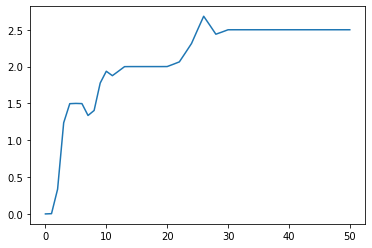

In [281]:
plt.plot(horizontal, test2)

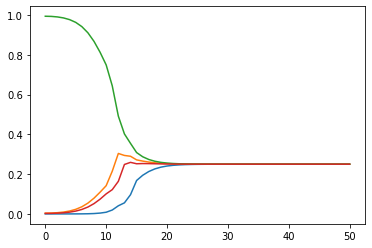

In [113]:
plt.plot(horizontal, TEST1)

In [122]:
test3 = []
for i in range(51):
    test3.append(efl(1, 2, 5, 0.5, i, -2))

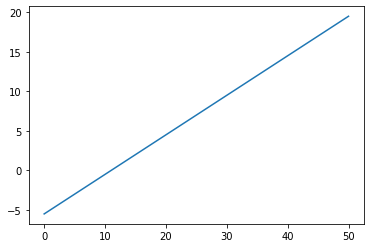

In [123]:
plt.plot(horizontal, test3)

In [335]:
 np.random.seed()?

SyntaxError: invalid syntax (<ipython-input-335-0fd9ffdadb78>, line 1)

In [340]:
rand = np.random.randint(0,10,5)

In [341]:
rand

array([7, 3, 7, 9, 5])

In [64]:
# Following function is made to be identical
# to the numerator function.

def A(gammapl, gammapr, C, ne, qext, eta, eV , kt, ep, ef):
    
    return(
    
    numerator(gammapl, gammapr, C, ne, qext, eta, eV , kt, ep, ef)
        
    )
    

In [65]:
def B(gammapl, gammapr, C, ne, qext, eta, eV , kt, ep, ef):
    
    return(
    
    gammapl*(Decimal(math.exp((efl(C, ne, qext, eta, eV, ep) - ef)/kt)))/(1 + Decimal(math.exp((efl(C, ne, qext, eta, eV, ep) - ef)/kt))) +   
    
    gammapr*( Decimal(math.exp((efr(C, ne, qext, eta, eV, ep) - ef)/kt)))/(1 + Decimal(math.exp((efr(C, ne, qext, eta, eV, ep) - ef)/kt))) 
        
    )

In [66]:
B00 = float(B(1,1,1,0,5,0.5,1,0.1,0,0))
B11 = float(B(1,1,1,1,5,0.5,1,0.1,0,0))
B02 = float(B(1,1,1,2,5,0.5,1,0.1,0,0))
B01 = float(B(1,1,1,1,5,0.5,1,0.1,0,0))
B12 = float(B(1,1,1,2,5,0.5,1,0.1,0,0))
#PN

In [67]:
A00 = float(A(1, 1, 1, 0, 5, 0.5, 1, 1, 0, 0))
A01 = float(A(1, 1, 1, 1, 5, 0.5, 1, 1, 0, 0))
A10 = float(A(1, 1, 1, 0, 5, 0.5, 1, 1, 0, 0))
A11 = float(A(1, 1, 1, 1, 5, 0.5, 1, 1, 0, 0))

In [68]:
# Following function is made to be identical
# to the denominator function.

def x(gammapl, gammapr, C, ne, qext, eta, eV , kt, ep, ef): 

    return(
    gammapl* (1 - F(kt, efl(C, ne, qext, eta, eV, ep) - ef)) +
        gammapr* (1 - F(kt, efr(C, ne, qext, eta, eV, ep) - ef))
    )

In [69]:
x00 = float(x(1,1,1,0,5,0.5,1,1,0,0))
x11 = float(x(1,1,1,1,5,0.5,1,1,0,0))
x02 = float(x(1,1,1,2,5,0.5,1,1,0,0))
x01 = float(x(1,1,1,1,5,0.5,1,1,0,0))
x12 = float(x(1,1,1,2,5,0.5,1,1,0,0))

mu

In [423]:
mu = np.array([[A00+A10, 0, x11, x01], [A10, (-1)*(A01+x11), x02, 0], [ 0, A01, (-1)*(x02+x12), A11], [1,1,1,1]])
kappa = np.array([0, 0, 0, 1])
d = np.linalg.solve(mu, kappa)

In [424]:
d

array([-0.0088644 ,  0.03533867,  0.91877078,  0.05475495])

In [70]:
# The following function returns the
# probabilities of all the configurations
# by solving the kinetic equation.

def new_probs(gammapl, gammapr, C, qext, eta, eV , kt, ep, ef):
    
    A00 = float(A(gammapl, gammapr, C, 0, qext, eta, eV, kt, ep[0], ef))
    A01 = float(A(gammapl, gammapr, C, 1, qext, eta, eV, kt, ep[0], ef))
    A10 = float(A(gammapl, gammapr, C, 0, qext, eta, eV, kt, ep[1], ef))
    A11 = float(A(gammapl, gammapr, C, 1, qext, eta, eV, kt, ep[1], ef))
    
    x00 = float(x(gammapl, gammapr, C, 0, qext, eta, eV, kt, ep[0], ef))
    x11 = float(x(gammapl, gammapr, C, 1, qext, eta, eV, kt, ep[1], ef))
    x02 = float(x(gammapl, gammapr, C, 2, qext ,eta, eV, kt, ep[0], ef))
    x01 = float(x(gammapl, gammapr, C, 1, qext, eta, eV, kt, ep[0], ef))
    x12 = float(x(gammapl, gammapr, C, 2, qext, eta, eV, kt, ep[1], ef))
    
    mu = np.array([[(-1)*(A00+A10), 0, x11, x01], [A10, (-1)*(A01+x11), x02, 0],
                   [ 0, A01, (-1)*(x02+x12), A11], [1,1,1,1]])
    
    kappa = np.array([0, 0, 0, 1])
    d = np.linalg.solve(mu, kappa)
    
    return(d)

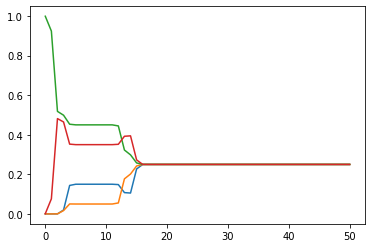

In [536]:
data3 = []
data4 = []
data5 = []
data6 = []
for i in range(51): 
    data3.append(new_probs(1,1,1,5,0.5, i, 0.1, [-2.82843, 2.82843], 0)[0])
    data4.append(new_probs(1,1,1,5,0.5, i, 0.1, [-2.82843, 2.82843], 0)[1])
    data5.append(new_probs(1,1,1,5,0.5, i, 0.1, [-2.82843, 2.82843], 0)[2])
    data6.append(new_probs(1,1,1,5,0.5, i, 0.1, [-2.82843, 2.82843], 0)[3])

plt.plot(data3)
plt.plot(data4)
plt.plot(data5)
plt.plot(data6)

In [522]:
ALLPROBABILITIES(1, 1, 1, 2, 5, 0.5, 8, 0.1, [0, 0], 0)[]

[Decimal('0.001112975430892596369197196000'),
 Decimal('0.3314733748355359135790133179'),
 Decimal('0.3359402748980355764727761684'),
 Decimal('0.3314733748355359135790133179')]

In [71]:
# The following equation solves
# the stationary current using 
# the probabilities from 
# the new_probs() function. 

def I_new(gammapl, gammapr, C, qext, eta, eV, kt, ep, ef):
    
    current = 0
    list = new_probs(gammapl, gammapr, C, qext, eta, eV, kt, ep, ef)
    config = Findladder(2)   
    for i in range(2):
        for j in range(len(config)):
            ne = sum(config[j])
            pni = list[j]
            if config[j][i] == 0:
                current += gammapl*pni*(-1)*float((F(kt, eil(C, ne, qext, eta, eV, ep[i])-ef)))
            elif config[j][i] == 1:
                current += gammapl*pni*float((1- F(kt, efl(C, ne, qext, eta, eV, ep[i])-ef)))
                
    
    return(current)

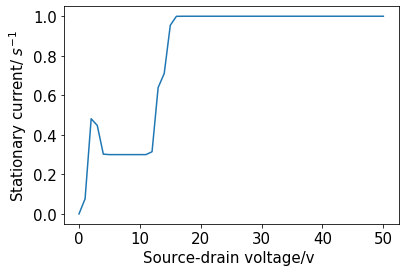

In [215]:
data = []
for i in range(51):
    data.append(I_new(1,1,1,5,0.5,i,0.1, [-2.82843, 2.82843], 0))
    
plt.xlabel('Source-drain voltage/v ', fontsize=15)
plt.ylabel('Stationary current/ $s^{-1}$', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.plot(data)


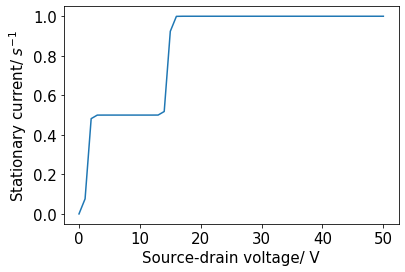

In [136]:
data1 = []
for i in range(51):
    data1.append(I([1,1],[1,1],1,2,5,0.5,i,0.1, [-2.82843, 2.82843], 0))
    
plt.xlabel('Source-drain voltage/ V', fontsize=15)
plt.ylabel('Stationary current/ $s^{-1}$', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.plot(data1)

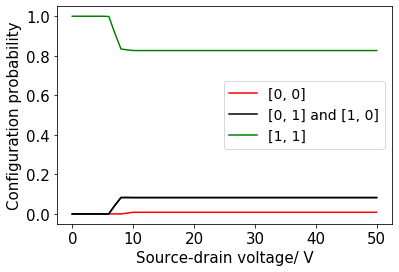

In [46]:
data2 = []
P2 = []
P3 = []
P4 = []
for i in range(51):
    data2.append(ALLPROBABILITIES([1,1],[10, 10],1,2,5,0.5,i,0.1, [0, 0], 0)[0])
    P2.append(ALLPROBABILITIES([1,1],[10, 10],1,2,5,0.5,i,0.1, [0, 0], 0)[1])
    P3.append(ALLPROBABILITIES([1,1],[10, 10],1,2,5,0.5,i,0.1, [0, 0], 0)[2])
    P4.append(ALLPROBABILITIES([1,1],[10, 10],1,2,5,0.5,i,0.1, [0, 0], 0)[3])
plt.plot(data2, color = 'r', label = '[0, 0]')
plt.plot(P2, color = 'k', label = '[0, 1] and [1, 0]')
plt.plot(P3, color = 'g', label = '[1, 1]')
plt.plot(P4, color = 'k')
# plt.title('Q_ext = 5')
plt.xlabel('Source-drain voltage/ V', fontsize=15)
plt.ylabel('Configuration probability', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(prop={'size': 14})

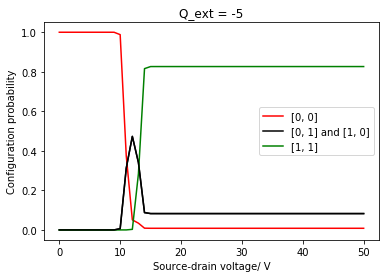

In [55]:
p5 = []
P6 = []
P7 = []
P8 = []
for i in range(51):
    p5.append(ALLPROBABILITIES([1,1],[10, 10],1,2,-5,0.5,i,0.1, [0, 0], 0)[0])
    P6.append(ALLPROBABILITIES([1,1],[10, 10],1,2,-5,0.5,i,0.1, [0, 0], 0)[1])
    P7.append(ALLPROBABILITIES([1,1],[10, 10],1,2,-5,0.5,i,0.1, [0, 0], 0)[2])
    P8.append(ALLPROBABILITIES([1,1],[10, 10],1,2,-5,0.5,i,0.1, [0, 0], 0)[3])
plt.plot(p5, color = 'r', label = '[0, 0]')
plt.plot(P6, color = 'k', label = '[0, 1] and [1, 0]')
plt.plot(P7, color = 'g', label = '[1, 1]')
plt.plot(P8, color = 'k')
plt.title('Q_ext = -5')
plt.xlabel('Source-drain voltage/ V')
plt.ylabel('Configuration probability')
plt.legend()

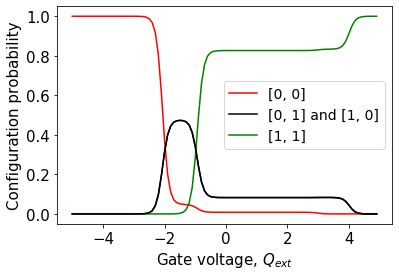

In [295]:
pa= []
Pb = []
Pc = []
Pd = []
for i in np.arange(-5, 5, 0.1):
    pa.append(ALLPROBABILITIES([1,1],[10, 10],1,2,i,0.5,5,0.1, [0, 0], 0)[0])
    Pb.append(ALLPROBABILITIES([1,1],[10, 10],1,2,i,0.5,5,0.1, [0, 0], 0)[1])
    Pc.append(ALLPROBABILITIES([1,1],[10, 10],1,2,i,0.5,5,0.1, [0, 0], 0)[2])
    Pd.append(ALLPROBABILITIES([1,1],[10, 10],1,2,i,0.5,5,0.1, [0, 0], 0)[3])
plt.plot([i for i in np.arange(-5, 5, 0.1)], pa, color = 'r', label = '[0, 0]')
plt.plot([i for i in np.arange(-5, 5, 0.1)], Pb, color = 'k', label = '[0, 1] and [1, 0]')
plt.plot([i for i in np.arange(-5, 5, 0.1)], Pc, color = 'g', label = '[1, 1]')
plt.plot([i for i in np.arange(-5, 5, 0.1)], Pd, color = 'k')
plt.xlabel('Gate voltage, $Q_{ext}$', fontsize=15)
plt.ylabel('Configuration probability', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(prop={'size': 14})

In [707]:
I([1,1],[10, 10],1,2,5,0.5,40,0.1, [0, 0], 0)

Decimal('1.818181818181818181818181818')

In [684]:
ALLPROBABILITIES([1,1],[10,10],1,2,5,0.5,40,0.1, [0, 0], 0)[3] + 2*ALLPROBABILITIES([1,1],[10,10],1,2,5,0.5,40,0.1, [0, 0], 0)[2] + ALLPROBABILITIES([1,1],[10,10],1,2,5,0.5,40,0.1, [0, 0], 0)[1]

Decimal('1.818181818181818181818181817')

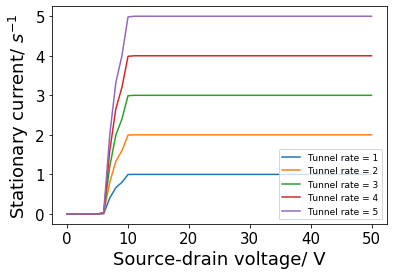

In [229]:
CURRENTS = []
CURRENTS2 = []
CURRENTS3 = []
CURRENTS4 = []
CURRENTS5 = []
for i in range(51):
    CURRENTS.append(I([1, 1],[1, 1],1,2,5,0.5,i,0.1, [0, 0], 0))
    CURRENTS2.append(I([2, 2],[2, 2],1,2,5,0.5,i,0.1, [0, 0], 0))
    CURRENTS3.append(I([3, 3],[3, 3],1,2,5,0.5,i,0.1, [0, 0], 0))
    CURRENTS4.append(I([4, 4],[4, 4],1,2,5,0.5,i,0.1, [0, 0], 0))
    CURRENTS5.append(I([5, 5],[5, 5],1,2,5,0.5,i,0.1, [0, 0], 0))
plt.plot(horizontal, CURRENTS, label = 'Tunnel rate = 1')
plt.plot(horizontal, CURRENTS2, label = 'Tunnel rate = 2')
plt.plot(horizontal, CURRENTS3, label = 'Tunnel rate = 3')
plt.plot(horizontal, CURRENTS4, label = 'Tunnel rate = 4')
plt.plot(horizontal, CURRENTS5, label = 'Tunnel rate = 5')
plt.xlabel('Source-drain voltage/ V', fontsize=18)
plt.ylabel('Stationary current/ $s^{-1}$', fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc='lower right',  prop={'size': 9})

Text(0, 0.5, 'Current/ I')

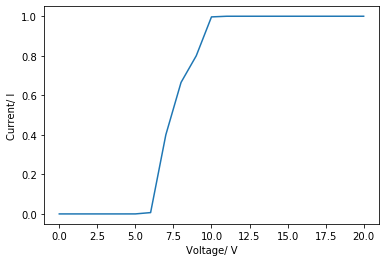

In [117]:
currents_list = []
for i in range(21):
    currents_list.append(I([1, 1],[1, 1],1,2,5,0.5,i, 0.1, [0, 0], 0))
plt.plot(currents_list)
plt.xlabel('Voltage/ V')
plt.ylabel('Current/ I')

Text(0, 0.5, 'Current/ I')

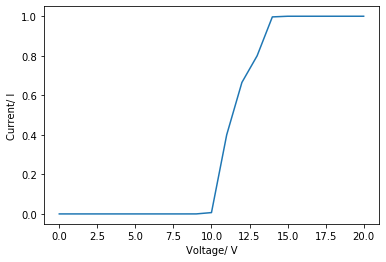

In [118]:
currents_list2 = []
for i in range(21):
    currents_list2.append(I([1, 1],[1, 1],1,2,-5,0.5,i, 0.1, [0, 0], 0))
plt.plot(currents_list2)
plt.xlabel('Voltage/ V')
plt.ylabel('Current/ I')

In [57]:
empty = np.empty(shape=(0,))

In [58]:
empty

array([], dtype=float64)

In [63]:
np.append(empty, [18,17])

array([18., 17.])

In [73]:
ALLPROBABILITIES([1,1],[10,10],1,2,5,0.5,40,0.1, [0, 0], 0)[1] 

Decimal('0.08264462809917355371900826446')

(array([-0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,
         2.  ]), <a list of 10 Text yticklabel objects>)

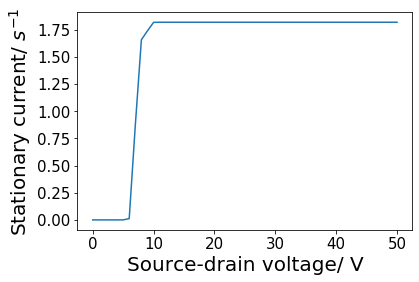

In [292]:
information = []
for i in range(51):
    information.append(I([1, 1],[10, 10],1,2,5,0.5,i, 0.1, [0, 0], 0))
plt.plot(information)
plt.xlabel('Source-drain voltage/ V', fontsize=20)
plt.ylabel('Stationary current/ $s^{-1}$', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

In [206]:
charge_density(5, 2)

Decimal('1.999999999999999369488322685')

In [531]:
two_state = []
three_state = []
four_state = []
five_state = []
for i in np.arange(-10, 10, 0.1):
    two_state.append(I([1, 1], [1, 1], 1, 2, i, 0.5, 5, 0.1, [0,0], 0))
    three_state.append(I([1, 1, 1], [1, 1, 1], 1, 3, i, 0.5, 5, 0.1, [0,0,0], 0))
    four_state.append(I([1, 1, 1, 1], [1, 1, 1, 1], 1, 4, i, 0.5, 5, 0.1, [0,0,0,0], 0))
    five_state.append(I([1, 1, 1, 1, 1], [1, 1, 1, 1, 1], 1, 5, i, 0.5, 5, 0.1, [0,0,0,0,0], 0))

In [532]:
six_state = []
for i in np.arange(-10, 10, 0.1):
    six_state.append(I([1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1], 1, 6, i, 0.5, 5, 0.1, [0,0,0,0,0,0], 0))

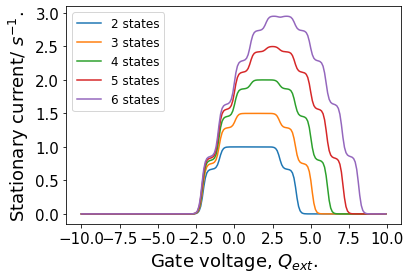

In [533]:
plt.xlabel("Gate voltage, $Q_{ext}$.", fontsize=18)
plt.ylabel("Stationary current/ $s^{-1}$.", fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.title("Stationary Currents Against Voltage for Different Numbers of States.")
plt.plot([i for i in np.arange(-10, 10, 0.1)], two_state, label = "2 states")
plt.plot([i for i in np.arange(-10, 10, 0.1)], three_state, label =  "3 states")
plt.plot([i for i in np.arange(-10, 10, 0.1)], four_state, label =  "4 states")
plt.plot([i for i in np.arange(-10, 10, 0.1)], five_state, label = "5 states")
plt.plot([i for i in np.arange(-10, 10, 0.1)], six_state, label = "6 states")
plt.legend(loc='upper left', prop={'size': 12})

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 <a list of 8 Text yticklabel objects>)

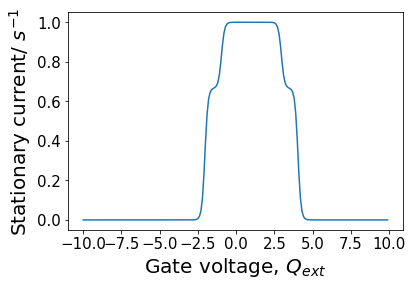

In [507]:
info_c = []
for i in np.arange(-10, 10, 0.1):
    info_c.append(I([1, 1],[1, 1],1,2,i,0.5,5, 0.1, [0, 0], 0))
plt.plot([i for i in np.arange(-10, 10, 0.1)], info_c)
plt.xlabel('Gate voltage, $Q_{ext}$', fontsize=20)
plt.ylabel('Stationary current/ $s^{-1}$', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

[Decimal('1.808852068427712E-27'),
 Decimal('1.403579720011979498381565246E-13'),
 Decimal('2.083191575400196618320954002E-11'),
 Decimal('3.091730422505834597438324414E-9'),
 Decimal('4.588532351200466366004592490E-7'),
 Decimal('0.0000680944846505613461865560262'),
 Decimal('0.00998913682547529054157547436'),
 Decimal('0.5454680525929270834277184338'),
 Decimal('0.8563185958124406405387385321'),
 Decimal('1.090886579011788194289852124'),
 Decimal('1.492508033240475847845187723'),
 Decimal('1.499948928363605787204151942'),
 Decimal('1.499999655854865682210527112'),
 Decimal('1.499999997681167092034328210'),
 Decimal('1.499999999984375826710416691'),
 Decimal('1.499999999999894725148467719'),
 Decimal('1.499999999999999290663630039'),
 Decimal('1.499999999999999995220529136'),
 Decimal('1.499999999999999999967796178'),
 Decimal('1.499999999999999999999783011'),
 Decimal('1.499999999999999999999998538'),
 Decimal('1.499999999999999999999999990'),
 Decimal('1.500000000000000000000000000'

(array([0.94, 0.96, 0.98, 1.  , 1.02, 1.04, 1.06]),
 <a list of 7 Text yticklabel objects>)

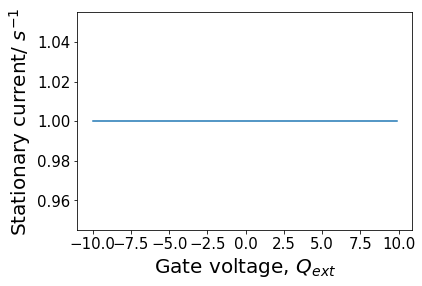

In [506]:
info_c2 = []
for i in np.arange(-10, 10, 0.1):
    info_c2.append(I([1, 1],[1, 1],1,2,i,0.5,40, 0.1, [0, 0], 0))
plt.plot([i for i in np.arange(-10, 10, 0.1)], info_c2)
plt.xlabel('Gate voltage, $Q_{ext}$', fontsize=20)
plt.ylabel('Stationary current/ $s^{-1}$', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

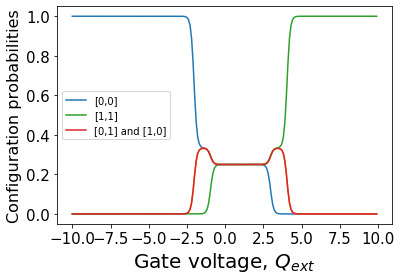

In [514]:
info_p = []
info_p2 = []
info_p3 = []
info_p4 = []
for i in np.arange(-10, 10, 0.1):
    info_p.append(ALLPROBABILITIES([1, 1],[1, 1],1,2,i,0.5,5, 0.1, [0, 0], 0)[0])
    info_p2.append(ALLPROBABILITIES([1, 1],[1, 1],1,2,i,0.5,5, 0.1, [0, 0], 0)[1])
    info_p3.append(ALLPROBABILITIES([1, 1],[1, 1],1,2,i,0.5,5, 0.1, [0, 0], 0)[2])
    info_p4.append(ALLPROBABILITIES([1, 1],[1, 1],1,2,i,0.5,5, 0.1, [0, 0], 0)[3])
plt.plot([i for i in np.arange(-10, 10, 0.1)], info_p, label = "[0,0]")
plt.plot([i for i in np.arange(-10, 10, 0.1)], info_p2)
plt.plot([i for i in np.arange(-10, 10, 0.1)], info_p3, label = "[1,1]")
plt.plot([i for i in np.arange(-10, 10, 0.1)], info_p4, label = "[0,1] and [1,0]")
plt.xlabel('Gate voltage, $Q_{ext}$', fontsize=20)
plt.ylabel('Configuration probabilities', fontsize=16)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend()

In [521]:
5/ (1+ 
1)

2.5